# Comparison of the performances for the different models

Trained models: random forest, perceptron (with and without elasticnet regularization), SVM

## Loading necessary libraries...

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn

## Loading results

In [2]:
methods = ["RF_scaled", "RRandomForest_scaled_", "Perceptron_scaled", "SVM_scaled", "RSVM_scaled_",
           "DNN_patient_scaled", "GNN_patient_scaled", "GNN_scaled", "glmgraph_scaled"]
all_scores = {}
metnames = []
for ind in range(len(methods)):
    file = "../../results/DREAM5/" + methods[ind] + "Scores_2023-11-09.obj"
    file = open(file, "rb")
    desc_met = methods[ind]
    all_scores[desc_met] = pickle.load(file)
    metnames.append(desc_met)

## Computing means and standard deviations

### Means

In [3]:
scorelist = ["fit_time", "score_time", "test_mean_squared_error", "test_r2", "test_explained_variance",
             "train_mean_squared_error", "train_r2", "train_explained_variance"]
all_means = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_means[i][j] = pd.DataFrame(all_scores[metnames[i]][scorelist[j]]).mean()
        
# Create the pandas DataFrame
all_means = pd.DataFrame(all_means, columns = scorelist, index = metnames)
# print dataframe.
all_means

fit_time  score_time  test_mean_squared_error  \
RF_scaled               96.282514    0.461785                 0.970459   
RRandomForest_scaled_  276.335200    0.234700                 0.428215   
Perceptron_scaled        2.345433    0.021161                 0.757136   
SVM_scaled               0.655713    1.481884                 0.427032   
RSVM_scaled_             6.512000    2.110200                 0.423152   
DNN_patient_scaled       3.157220    0.106120                 1.999158   
GNN_patient_scaled       8.407415    0.318367                 1.999158   
GNN_scaled             159.361813    0.103903                 0.515118   
glmgraph_scaled        479.140900    0.009900                 0.469242   

                        test_r2  test_explained_variance  \
RF_scaled              0.007109             2.130284e-02   
RRandomForest_scaled_  0.565796             5.703606e-01   
Perceptron_scaled      0.232974             2.387787e-01   
SVM_scaled             0.566832             5.714157e-01   
RSVM_scaled_           0.571344             5.779850e-01   
DNN_patient_scaled    -1.022599            -2.220446e-17   
GNN_patient_scaled    -1.022599            -2.220446e-17   
GNN_scaled             0.477175             4.851794e-01   
glmgraph_scaled        0.524294             5.308607e-01   

                       train_mean_squared_error  train_r2  \
RF_scaled                          4.744714e-29  1.000000   
RRandomForest_scaled_              4.744717e-29  1.000000   
Perceptron_scaled                  3.084163e-02  0.969093   
SVM_scaled                         1.195652e-01  0.880278   
RSVM_scaled_                       1.196854e-01  0.880159   
DNN_patient_scaled                 1.998763e+00 -1.001512   
GNN_patient_scaled                 1.998763e+00 -1.001512   
GNN_scaled                         3.356887e-01  0.664014   
glmgraph_scaled                    3.197726e-01  0.679757   

                       train_explained_variance  
RF_scaled                              1.000000  
RRandomForest_scaled_                  1.000000  
Perceptron_scaled                      0.969578  
SVM_scaled                             0.880590  
RSVM_scaled_                           0.880464  
DNN_patient_scaled                     0.000000  
GNN_patient_scaled                     0.000000  
GNN_scaled                             0.664037  
glmgraph_scaled                        0.679859

### Standard deviations

In [4]:
all_std = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_std[i][j] = pd.DataFrame(all_scores[metnames[i]][scorelist[j]]).std()

# Create the pandas DataFrame
all_std = pd.DataFrame(all_std, columns = scorelist, index = metnames)
# print dataframe.
all_std

fit_time  score_time  test_mean_squared_error  \
RF_scaled              15.582557    0.026766                 0.199377   
RRandomForest_scaled_   3.825788    0.010605                 0.060806   
Perceptron_scaled       0.462200    0.014788                 0.142292   
SVM_scaled              0.025188    0.064671                 0.072266   
RSVM_scaled_            0.070081    0.031048                 0.051314   
DNN_patient_scaled      0.109618    0.008937                 0.231755   
GNN_patient_scaled      0.491140    0.018440                 0.231755   
GNN_scaled              1.101385    0.001746                 0.078827   
glmgraph_scaled         7.578142    0.000316                 0.056988   

                        test_r2  test_explained_variance  \
RF_scaled              0.253786             2.429268e-01   
RRandomForest_scaled_  0.064036             6.468652e-02   
Perceptron_scaled      0.140393             1.469748e-01   
SVM_scaled             0.046463             4.614686e-02   
RSVM_scaled_           0.050376             5.220762e-02   
DNN_patient_scaled     0.194300             1.638389e-16   
GNN_patient_scaled     0.194300             1.638389e-16   
GNN_scaled             0.086244             8.593579e-02   
glmgraph_scaled        0.059652             5.985177e-02   

                       train_mean_squared_error  train_r2  \
RF_scaled                          1.122541e-30  0.000000   
RRandomForest_scaled_              1.122576e-30  0.000000   
Perceptron_scaled                  3.054650e-02  0.030629   
SVM_scaled                         4.083030e-03  0.003416   
RSVM_scaled_                       4.171787e-03  0.003799   
DNN_patient_scaled                 2.563572e-02  0.021875   
GNN_patient_scaled                 2.563572e-02  0.021875   
GNN_scaled                         7.532671e-02  0.074754   
glmgraph_scaled                    5.244525e-03  0.006692   

                       train_explained_variance  
RF_scaled                          0.000000e+00  
RRandomForest_scaled_              0.000000e+00  
Perceptron_scaled                  3.048929e-02  
SVM_scaled                         3.408358e-03  
RSVM_scaled_                       3.743927e-03  
DNN_patient_scaled                 1.046728e-16  
GNN_patient_scaled                 1.046728e-16  
GNN_scaled                         7.474536e-02  
glmgraph_scaled                    6.648594e-03

## Plotting results

### Averaged results

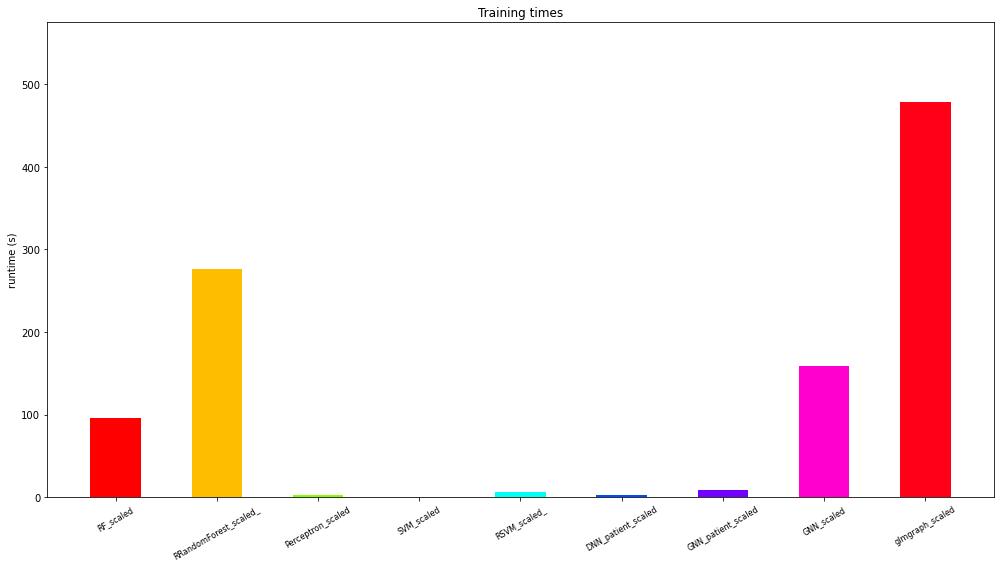

In [5]:
train_time = all_means["fit_time"]
my_cmap = plt.get_cmap("hsv")

def autolabel(rectangles):
    """attach some text vi autolabel on rectangles."""
    for rect in rectangles:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2.0,
            1.05 * height,
            "%.4f" % height,
            ha="center",
            va="bottom",
        )
        plt.setp(plt.xticks()[1], rotation=30)

plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), train_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(train_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Training times")
plt.tight_layout()
plt.show()

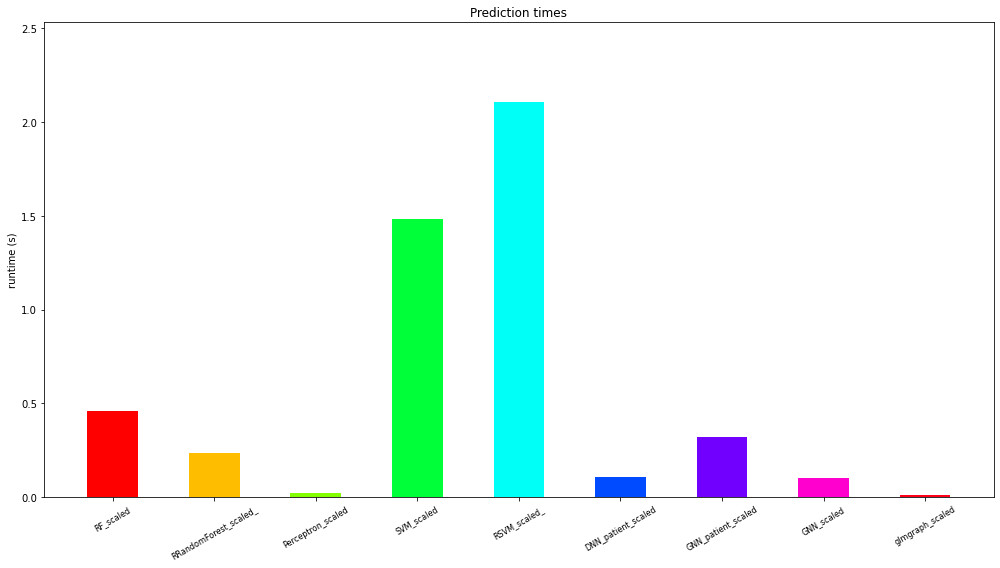

In [6]:
predict_time = all_means["score_time"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), predict_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(predict_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Prediction times")
plt.tight_layout()
plt.show()

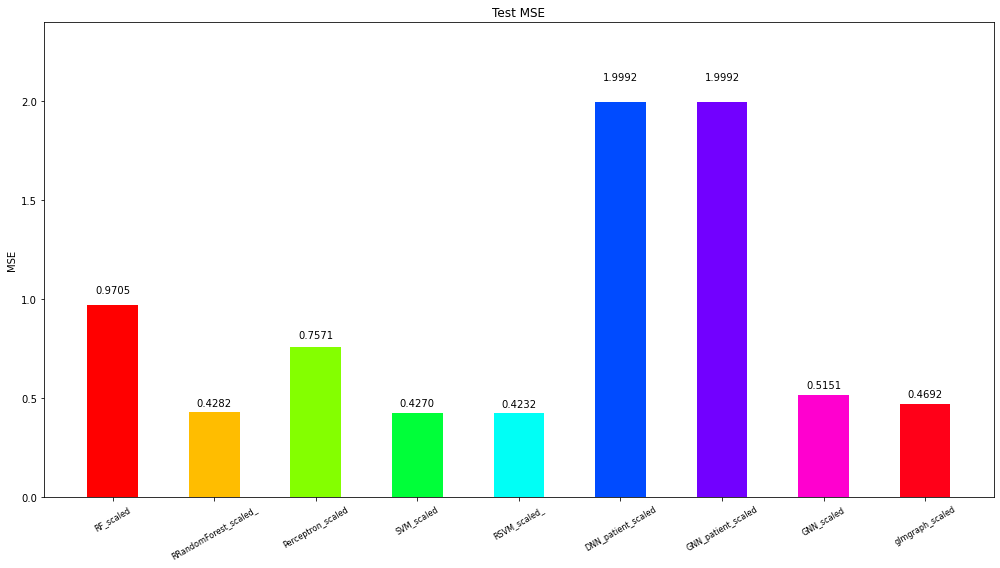

In [7]:
test_mse = all_means["test_mean_squared_error"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), test_mse, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(test_mse) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("MSE")
ax.set_title("Test MSE")
autolabel(rectangles)
plt.tight_layout()
plt.show()

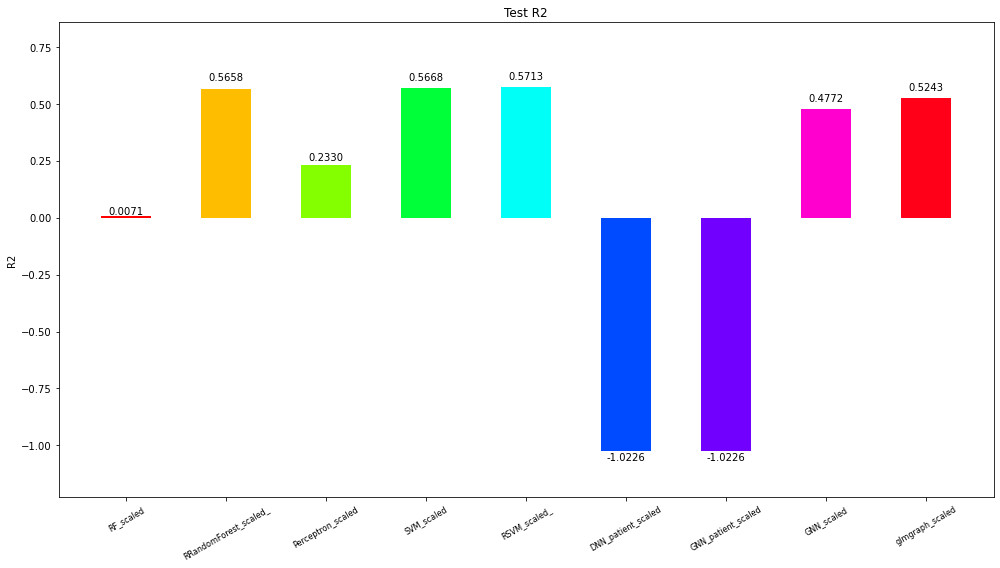

In [8]:
test_r2 = all_means["test_r2"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), test_r2, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(test_r2) * 1.5
ymin = min(test_r2) * 1.2
ax.set_ylim((ymin, ymax))
ax.set_ylabel("R2")
ax.set_title("Test R2")
autolabel(rectangles)
plt.tight_layout()
plt.show()

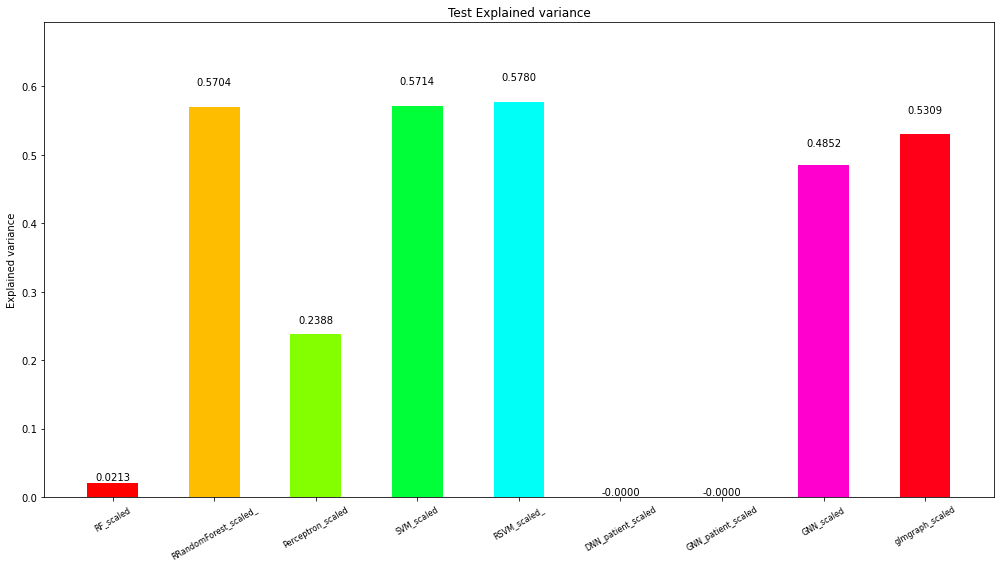

In [9]:
expl_var = all_means["test_explained_variance"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), expl_var, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(expl_var) * 1.2
ymin = min(expl_var) * 1.2
ax.set_ylim((ymin, ymax))
ax.set_ylabel("Explained variance")
ax.set_title("Test Explained variance")
autolabel(rectangles)
plt.tight_layout()
plt.show()

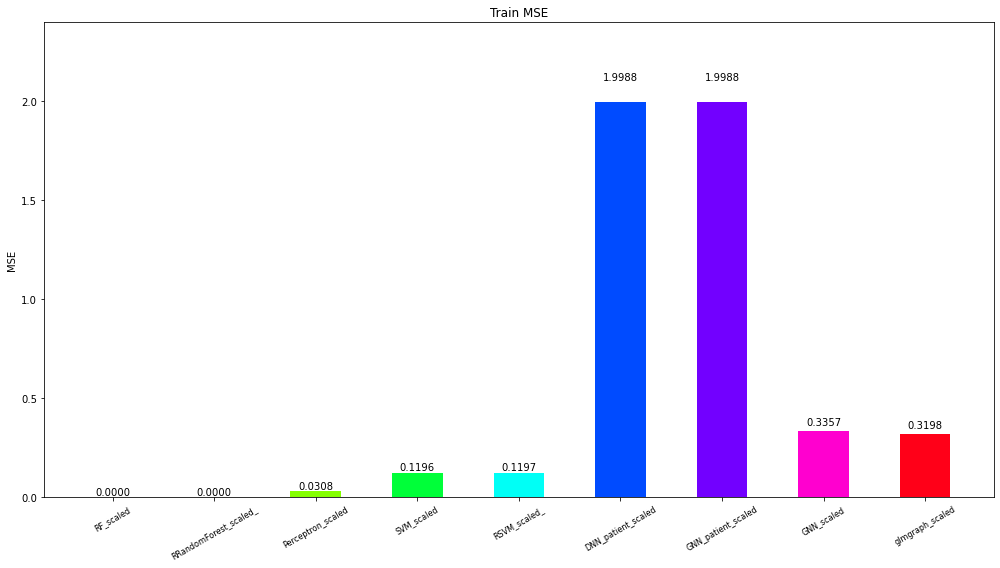

In [10]:
mse = all_means["train_mean_squared_error"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), mse, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(mse) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("MSE")
ax.set_title("Train MSE")
autolabel(rectangles)
plt.tight_layout()
plt.show()

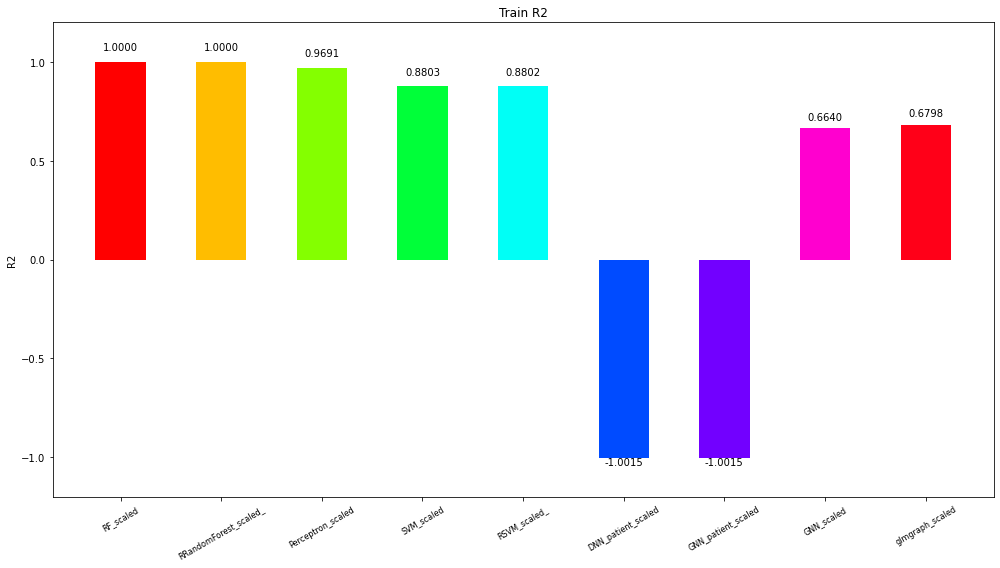

In [11]:
r2 = all_means["train_r2"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), r2, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(r2) * 1.2
ymin = min(r2) * 1.2
ax.set_ylim((ymin, ymax))
ax.set_ylabel("R2")
ax.set_title("Train R2")
autolabel(rectangles)
plt.tight_layout()
plt.show()

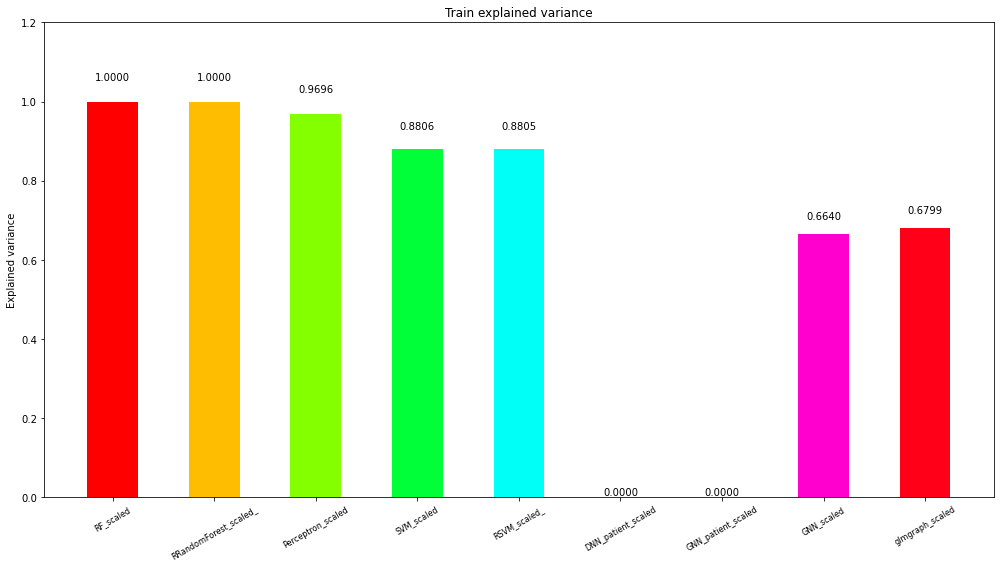

In [12]:
expl_var = all_means["train_explained_variance"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), expl_var, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(expl_var) * 1.2
ymin = min(expl_var) * 1.2
ax.set_ylim((ymin, ymax))
ax.set_ylabel("Explained variance")
ax.set_title("Train explained variance")
autolabel(rectangles)
plt.tight_layout()
plt.show()

### Full distribution

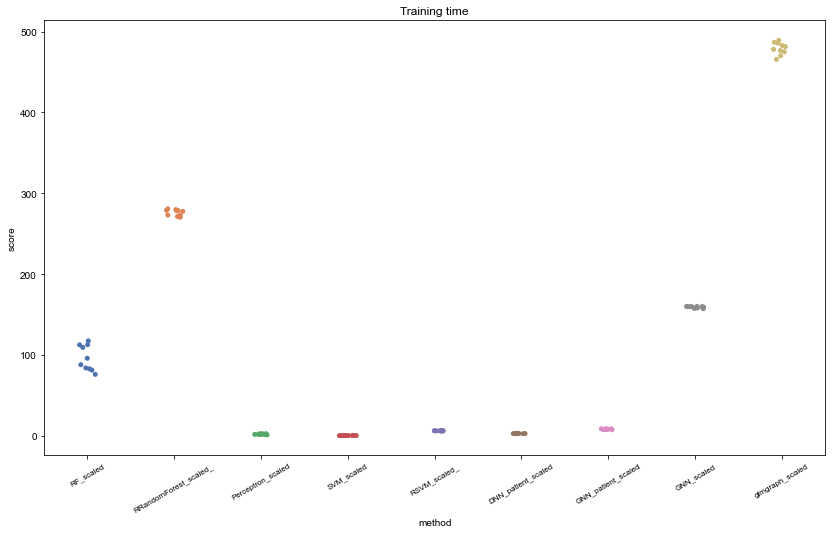

In [13]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["fit_time"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Training time")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

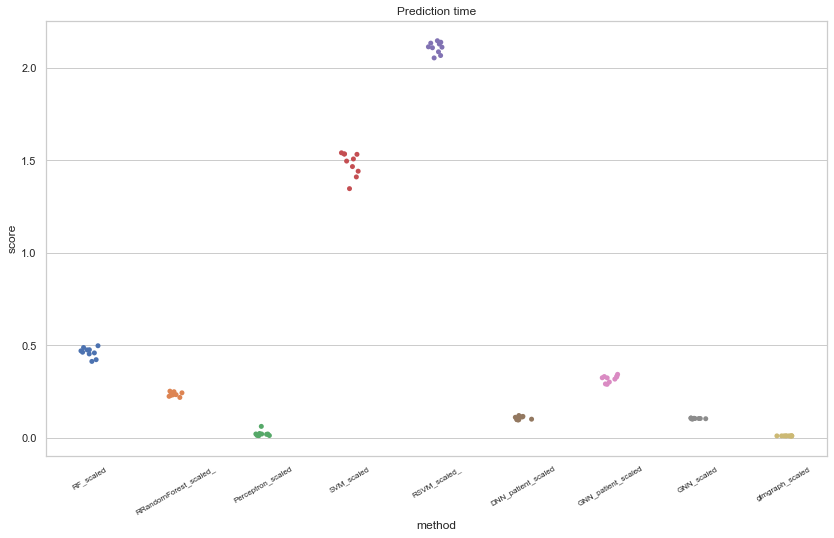

In [14]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["score_time"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Prediction time")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

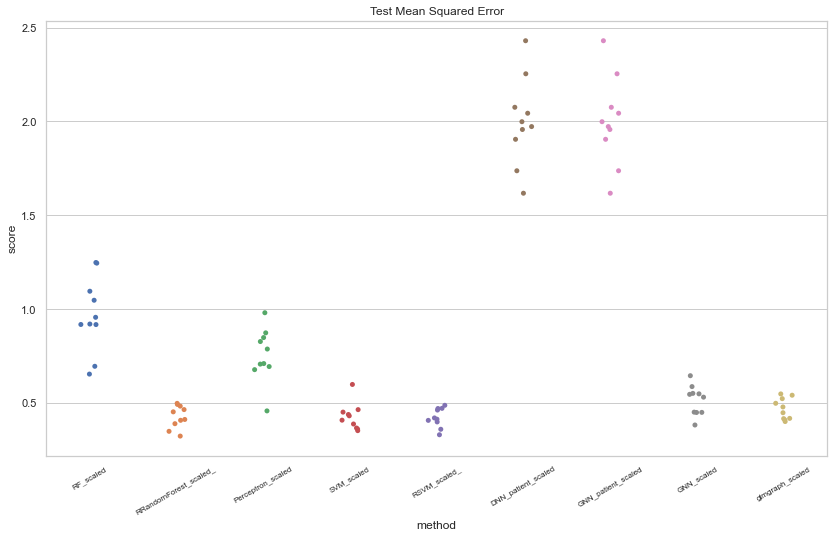

In [15]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["test_mean_squared_error"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Test Mean Squared Error")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

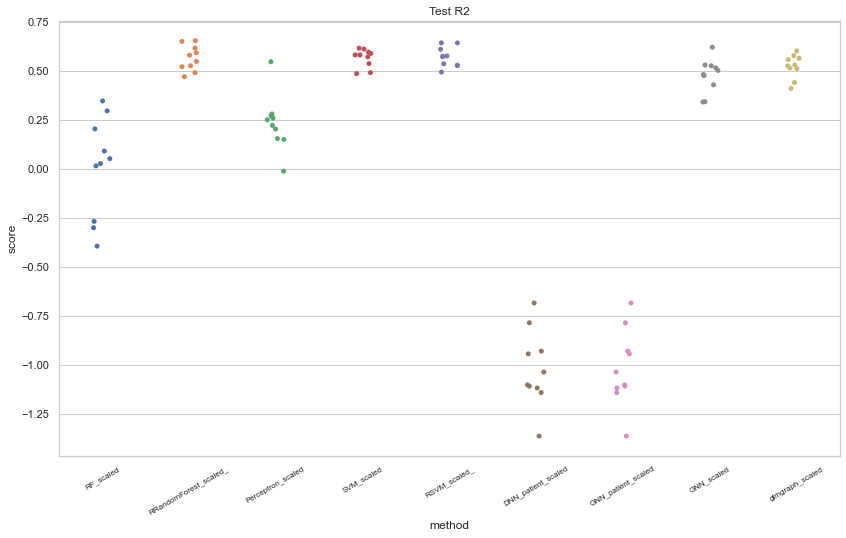

In [16]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["test_r2"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Test R2")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

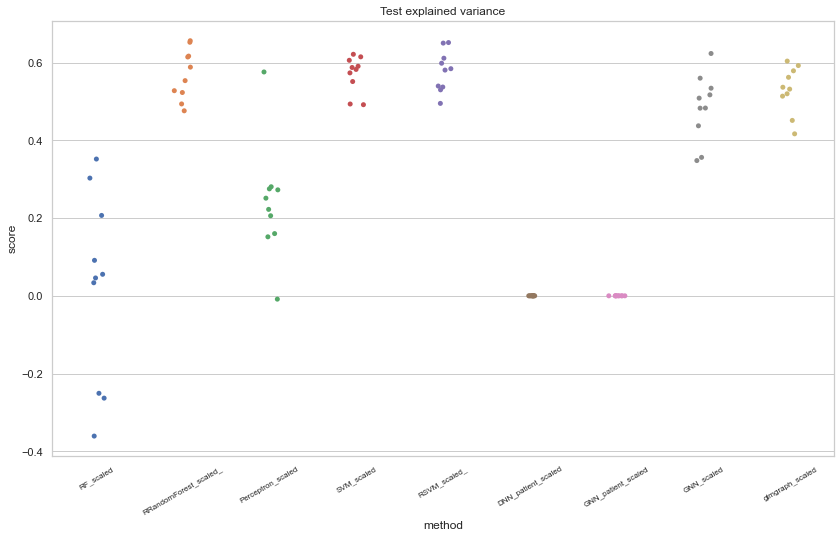

In [17]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["test_explained_variance"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Test explained variance")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

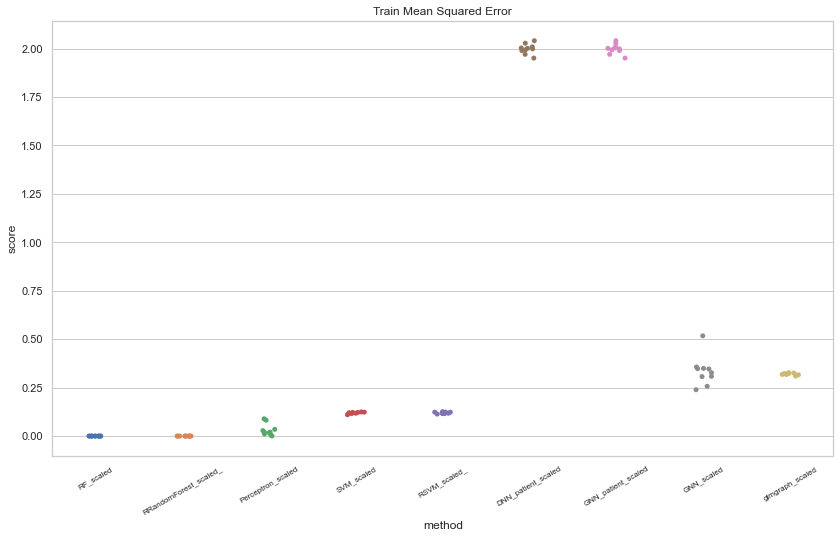

In [18]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["train_mean_squared_error"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Train Mean Squared Error")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

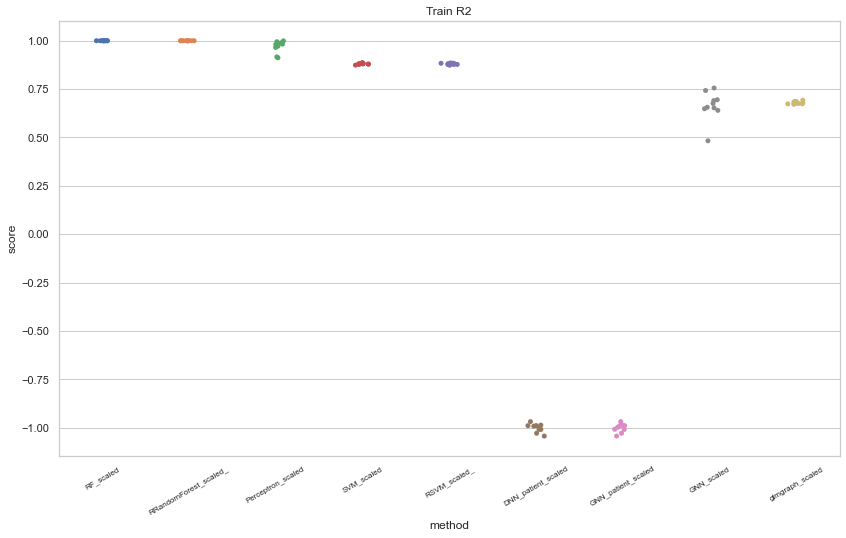

In [19]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["train_r2"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Train R2")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

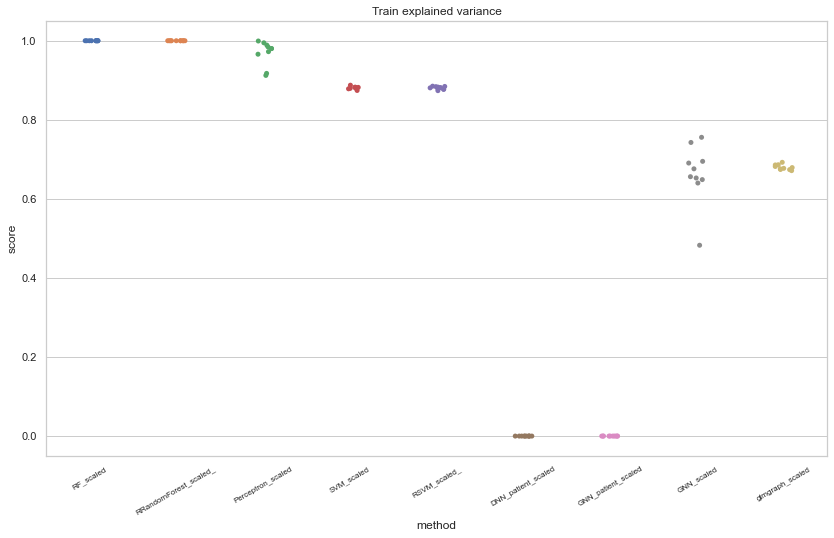

In [20]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["train_explained_variance"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Train explained variance")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()